$ELEC\ 400m$\
$Sept\ 29\ 2022$\
$Matthew\ Sam$\
$80646300$

## Question 1 -- Linear Regression

In [ ]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# link google drive
from google.colab import drive
drive.mount('/content/drive')
assn_path = '/content/drive/MyDrive/400m/HW1'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read datasets
training_dataset = pd.read_csv(str(assn_path) + '/training_set.csv')
testing_dataset = pd.read_csv(str(assn_path) + '/testing_set.csv')

In [ ]:
# process the testing and training datasets
X_train = training_dataset['x'].values
X_test = testing_dataset['x'].values
y_train = training_dataset['y'].values
y_test = testing_dataset['y'].values

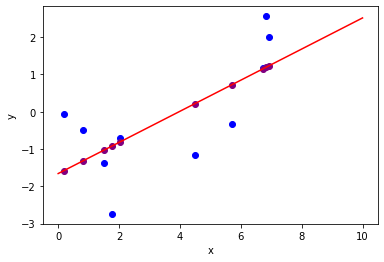

In [ ]:
# 1a)
# matrix method for additional x's
ones = np.array([1,1,1,1,1,1,1,1,1,1])
X_matrix = np.column_stack((ones,X_train))
transpose_X_matrix = X_matrix.transpose()
# matrix formula for solving optimal theta is given by ((X_transpose*X)^-1)(X_transpose*Y)
# futher broken down as operation a being X_transpose*X, b being result_a inverse, c being X_transpose*Y, and theta being the result of b and c multiplied
a = np.matmul(transpose_X_matrix,X_matrix)
b = np.linalg.inv(a)
c = np.matmul(transpose_X_matrix, y_train)
theta_a = np.matmul(b,c)
yhat = X_matrix.dot(theta_a)

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot(x, theta_a[0]+theta_a[1]*x, color='red')
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_train, yhat, color='purple')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [ ]:
# add columns for x^2 x^3 and x^4 for parts b and c of the question
for i in range(2,5):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    training_dataset[colname] = training_dataset['x']**i
print(training_dataset.head())


X2_train = training_dataset['x_2'].values
X3_train = training_dataset['x_3'].values
X4_train = training_dataset['x_4'].values

   Sample_ID     x     y      x_2         x_3          x_4
0          1  6.94  2.00  48.1636  334.255384  2319.732365
1          2  0.19 -0.07   0.0361    0.006859     0.001303
2          3  5.70 -0.32  32.4900  185.193000  1055.600100
3          4  6.74  1.17  45.4276  306.182024  2063.666842
4          5  4.49 -1.16  20.1601   90.518849   406.429632


(10,)


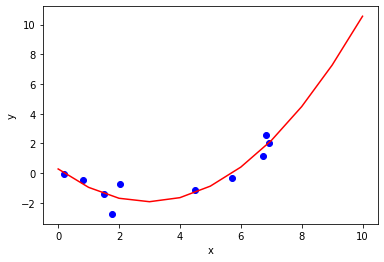

In [ ]:
# 1b)
# matrix method for additional x's
ones = np.array([1,1,1,1,1,1,1,1,1,1])
X_matrix = np.column_stack((ones,X_train,X2_train))
print(np.shape(X_train))
transpose_X_matrix = X_matrix.transpose()
# matrix formula for solving optimal theta is given by ((X_transpose*X)^-1)(X_transpose*Y)
# futher broken down as operation a being X_transpose*X, b being result_a inverse, c being X_transpose*Y, and theta being the result of b and c multiplied
a = np.matmul(transpose_X_matrix,X_matrix)
b = np.linalg.inv(a)
c = np.matmul(transpose_X_matrix, y_train)
theta_b = np.matmul(b,c)
yhat = X_matrix.dot(theta_b)

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot(x, theta_b[0]+theta_b[1]*x+theta_b[2]*(x**2), color='red')
plt.scatter(X_train, y_train, color='blue')
# plt.scatter(X_train, yhat, color='purple')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

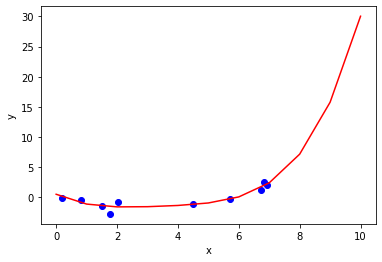

In [ ]:
# 1c)
# matrix method for additional x's
ones = np.array([1,1,1,1,1,1,1,1,1,1])
ones.shape = (10,1)
X_matrix = np.column_stack((ones,X_train,X2_train,X3_train,X4_train))
transpose_X_matrix = X_matrix.transpose()
# matrix formula for solving optimal theta is given by ((X_transpose*X)^-1)(X_transpose*Y)
# futher broken down as operation a being X_transpose*X, b being result_a inverse, c being X_transpose*Y, and theta being the result of b and c multiplied
a = np.matmul(transpose_X_matrix,X_matrix)
b = np.linalg.inv(a)
c = np.matmul(transpose_X_matrix, y_train)
theta_c = np.matmul(b,c)

x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.plot(x, theta_c[0]+theta_c[1]*x+theta_c[2]*(x**2)+theta_c[3]*(x**3)+theta_c[4]*(x**4), color='red')
plt.scatter(X_train, y_train, color='blue')
# plt.scatter(X_train, yhat, color='purple')
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [50]:
#1d)
# the formula for RSS is given as follows: (X*theta - Y)^T * (X*theta - Y)
# with 3 options I would be inclined to say that a) would be underfit b) is the best fit of the three and c) is overfit

# add columns for x^2 x^3 and x^4 for parts b and c of the question
for i in range(2,5):  #power of 1 is already there
    colname = 'x_%d'%i      #new var will be x_power
    testing_dataset[colname] = testing_dataset['x']**i


X2_test = testing_dataset['x_2'].values
X3_test = testing_dataset['x_3'].values
X4_test = testing_dataset['x_4'].values
Y = y_test

# for a)
X_matrix_a = np.column_stack((ones,X_test))
Jtheta_a = np.matmul((np.matmul(X_matrix_a, theta_a).transpose()-Y),(np.matmul(X_matrix_a, theta_a)-Y))

# for b)
X_matrix_b = np.column_stack((ones,X_test,X2_test))
Jtheta_b = np.matmul((np.matmul(X_matrix_b, theta_b).transpose()-Y),(np.matmul(X_matrix_b, theta_b)-Y))

# for c)
X_matrix_c = np.column_stack((ones,X_test,X2_test,X3_test,X4_test))
Jtheta_c = np.matmul((np.matmul(X_matrix_c, theta_c).transpose()-Y),(np.matmul(X_matrix_c, theta_c)-Y))

RSS_error_means=(
np.mean(Jtheta_a),
np.mean(Jtheta_b),
np.mean(Jtheta_c))

print(RSS_error_means)

(26.51074244053679, 4.337861648847775, 7.439126478286353)


In [51]:
#e)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn import metrics

# load data
model1 =  LinearRegression().fit(X_train.reshape(-1, 1), y_train)
model2 =  LinearRegression().fit(np.column_stack((X_train,X2_train)), y_train)
model3 =  LinearRegression().fit(np.column_stack((X_train,X2_train,X3_train,X4_train)), y_train)

# # theta 0's
# print(model1.intercept_)
# print(model2.intercept_)
# print(model3.intercept_)
# # thetas
# print(model1.coef_)
# print(model2.coef_)
# print(model3.coef_)

print("thetas from my model: ")
print(" my model1: ", theta_a)
print(" my model2: ", theta_b)
print(" my model2: ", theta_c)
print("thetas from SKL: ")
print(" my model1: ", np.append(model1.intercept_,model1.coef_))
print(" my model2: ", np.append(model2.intercept_,model2.coef_))
print(" my model2: ", np.append(model3.intercept_,model3.coef_))

thetas from my model: 
 my model1:  [-1.65766519  0.41725154]
 my model2:  [ 0.28514264 -1.48968069  0.25172685]
 my model2:  [ 0.51817538 -2.52130644  1.07886107 -0.19978244  0.01466235]
thetas from SKL: 
 my model1:  [-1.65766519  0.41725154]
 my model2:  [ 0.28514264 -1.48968069  0.25172685]
 my model2:  [ 0.51817538 -2.52130644  1.07886107 -0.19978244  0.01466235]


## Question 2: Logistic Regression

In [52]:
# import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

np.random.seed(0)
random.seed(0)

In [53]:
# link google drive
from google.colab import drive
drive.mount('/content/drive')
assn_path = '/content/drive/MyDrive/400m/HW1'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
# read datasets
training_dataset = pd.read_csv(str(assn_path) + '/training_set_2.csv')
testing_dataset = pd.read_csv(str(assn_path) + '/testing_set_2.csv')
print(training_dataset)

   Sample ID    x1    x2  y
0          1  1.15  1.74  0
1          2  1.26  1.53  0
2          3  1.01  1.92  0
3          4  1.90  1.03  0
4          5  2.96  0.14  1
5          6  2.28  0.61  1
6          7  2.94  0.85  1
7          8  2.00  0.52  1


In [55]:
def calculate_loss(X, y, theta):
    """
    Calculate the cross-entropy loss function given X, y, and theta
    """
    ones = np.array([1,1,1,1,1,1,1,1])
    X = np.column_stack((ones,X))
    # f_x = X.dot(theta) 
    # f_x = np.vdot(X, theta)
    # y_probs = 1 / (1 + np.exp(-f_x)) # P(y)
    loss = 0
    for i in range(0, len(y)):

      f_x = np.vdot(X[i], theta)
      y_probs = 1 / (1 + np.exp(-f_x))
      loss += -y[i]*np.log(y_probs) -(1-y[i])*np.log(1-y_probs)
    return loss


def calculate_grad(X, y, theta):
    """
    Calculate the gradient of the cross-entropy loss w.r.t. theta
    """
    ones = np.array([1,1,1,1,1,1,1,1])
    X = np.column_stack((ones,X))
    theta_grad = 0
    for i in range(0, len(y)):
      f_x = np.vdot(X[i], theta)
      y_probs = 1 / (1 + np.exp(-f_x))
      theta_grad += (y_probs-y[i])*X[i]
    return theta_grad


def has_converged(loss, new_loss):
    """
    Check if the model has converged and loss remains stable.
    """
    return abs(loss - new_loss) < 0.000001
    

def calculate_new_theta(theta, theta_grad, alpha):
    """
    Calculate the updated theta based on theta, gradient of theta, and step size
    """
    # print(type(theta), type(alpha), type(theta_grad))
    return theta - alpha * theta_grad

In [56]:
# Please load load X and y in training set


X = training_dataset[['x1','x2']].values
y = training_dataset['y'].values

# Initialize parameter and hyperparameters
loss = float('inf')
new_loss = float('inf')
new_theta = np.array([float('inf'), float('inf'), float('inf')])

alpha = 0.1
theta = [-1, -1.5, 0.5] # initial theta

iters = 0

# Perform Logistic Regression
while not has_converged(loss, new_loss):
    loss = new_loss
    theta_grad = calculate_grad(X, y, theta)
    new_theta = calculate_new_theta(theta, theta_grad, alpha)
    if iters==1:
      theta_1 = theta
    new_loss = calculate_loss(X, y, new_theta)

    theta = new_theta
    iters += 1
    # Uncomment the following line to print the loss at each step (for debugging purpose)
    # print(f"New Theta: {new_theta}, New Loss: {new_loss}, Iteration {iters}")
theta_final = theta
print(f"Final Theta: {theta}, Loss: {calculate_loss(X, y, theta)}, Total Iterations: {iters}")

Final Theta: [ -2.65176417   9.05891299 -19.07290853], Loss: 0.01219369294867664, Total Iterations: 12203


[-1.0, -1.5, 0.5] [-0.65014251 -0.54681755  0.63228741] [ -2.65176417   9.05891299 -19.07290853]


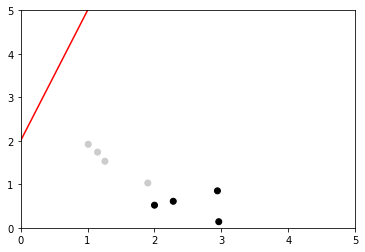

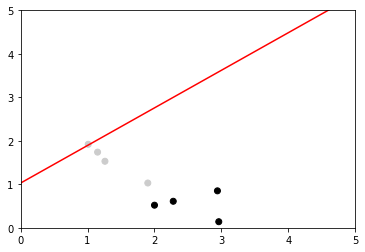

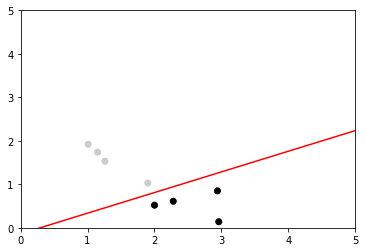

In [57]:
'''
These get filled in above

theta_init = [-1.0, -1.5, 0.5]
theta_1 = 
theta_final = 
'''
theta_init = [-1.0, -1.5, 0.5]
print(theta_init, theta_1, theta_final)
for theta in [theta_init, theta_1, theta_final]:
    '''
    TODO: Plot the training data scatter plot, truth labels, and model's decision boundary hyperplane on the same plot.

    theta optimal = [a b c]
    ax1+bx2+c = hyperplane
    '''

    X1 = training_dataset['x1'].values
    X2 = training_dataset['x2'].values    

    x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    plt.plot(-(theta[0]+theta[1]*x)/theta[2], color='red')
    plt.scatter(X1, X2, c = y, cmap='nipy_spectral_r')
    plt.xlim(0, 5)
    plt.ylim(0, 5)
    plt.show()

In [58]:
# q2d)
from sklearn.linear_model import LogisticRegression

X_train = training_dataset[['x1','x2']].values
y_train = training_dataset['y'].values
X_test = testing_dataset[['x1','x2']].values
y_test = testing_dataset['y'].values


model = LogisticRegression(max_iter=50000, penalty='none')
model.fit(X_train, y_train)

theta_0 = model.intercept_
thetas = model.coef_
print(theta_0)
print(thetas)

[-2.91576747]
[[ 15.90678769 -35.93982465]]


In [59]:
# q2e)
predicted_y_SK = model.predict(X_test)

ones = np.array([1,1,1,1,1,1])
X_test = np.column_stack((ones,X_test))
f_x = X_test.dot(theta_final)
y_probs = 1 / (1 + np.exp(-f_x))
predicted_y_GD = np.where(y_probs > 0.5, 1, 0)

print("Ground truth y_test: ", y_test)
print("Prediction of y_test from SKLearn: ", predicted_y_SK)
print("Prediction of y_test from gradient descent: ", predicted_y_GD)

#metric matrix is a list of 4 values
# values are [TP, FP, FN, TN]
metrics_GD  = [0,0,0,0]
metrics_SKL = [0,0,0,0]

for i in range(len(predicted_y_GD)):
  if (predicted_y_GD[i] == 1) and (y_test[i] == 1): #TP
    metrics_GD[0] += 1
  if (predicted_y_GD[i] == 1) and (y_test[i] == 0): #FP
    metrics_GD[1] += 1
  if (predicted_y_GD[i] == 0) and (y_test[i] == 1): #FN
    metrics_GD[2] += 1
  if (predicted_y_GD[i] == 0) and (y_test[i] == 0): #TN
    metrics_GD[3] += 1

for i in range(len(predicted_y_SK)):
  if (predicted_y_SK[i] == 1) and (y_test[i] == 1): #TP
    metrics_SKL[0] += 1
  if (predicted_y_SK[i] == 1) and (y_test[i] == 0): #FP
    metrics_SKL[1] += 1
  if (predicted_y_SK[i] == 0) and (y_test[i] == 1): #FN
    metrics_SKL[2] += 1
  if (predicted_y_SK[i] == 0) and (y_test[i] == 0): #TN
    metrics_SKL[3] += 1


# accuracy = (TP+TN)/(TP+FP+TN+FN)
# Precision = TP/(TP+FP)
# Sensitivity = TP/(TP+FN)

def accuracy(metrics):
  return ((metrics[0]+metrics[3])/(np.sum(metrics)))
def precision(metrics):
  return metrics[0]/(metrics[0]+metrics[1])
def sense(metrics):
  return metrics[0]/(metrics[0]+metrics[3])

print("metrics GD: ")
print(" accuracy: ", accuracy(metrics_GD))
print(" precision: ", precision(metrics_GD))
print(" sensitivity: ", sense(metrics_GD))
print("metrics SKL: ")
print(" accuracy: ", accuracy(metrics_SKL))
print(" precision: ", precision(metrics_SKL))
print(" sensitivity: ", sense(metrics_SKL))



Ground truth y_test:  [0 0 0 1 1 1]
Prediction of y_test from SKLearn:  [0 0 0 0 1 1]
Prediction of y_test from gradient descent:  [0 0 0 0 1 1]
metrics GD: 
 accuracy:  0.8333333333333334
 precision:  1.0
 sensitivity:  0.4
metrics SKL: 
 accuracy:  0.8333333333333334
 precision:  1.0
 sensitivity:  0.4
